In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import requests 
from bs4 import BeautifulSoup 
import seaborn as sns

In [3]:
# offical ministry of health website
url = 'https://www.mohfw.gov.in/' 

# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content

# parse the html content means looking for some patern
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]

In [5]:
stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

# now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.set_index('Sr.No',inplace=True)
state_data

,States/UT,Confirmed,Recovered,Deceased
Sr.No,,,,
1,Andaman and Nicobar Islands,33,33,0
2,Andhra Pradesh,2474,1552,50
3,Arunachal Pradesh,1,1,0
4,Assam,107,41,2
5,Bihar,1391,494,9
6,Chandigarh,196,54,3
7,Chhattisgarh,93,59,0
8,Dadar Nagar Haveli,1,0,0
9,Delhi,10054,4485,168


In [56]:
state_data['Confirmed'] = pd.to_numeric(state_data['Confirmed'], errors='coerce').fillna(0).astype(int)
state_data['Recovered'] = pd.to_numeric(state_data['Recovered'], errors='coerce').fillna(0).astype(int)
state_data['Deceased'] = pd.to_numeric(state_data['Deceased'], errors='coerce').fillna(0).astype(int)

state_data['Active']= state_data['Confirmed']-state_data['Recovered']-state_data['Deceased']
state=state_data.sort_values('Active',ascending=False)
state

,States/UT,Confirmed,Recovered,Deceased,Active
Sr.No,,,,,
20,Maharashtra,35058,8437,1249,25372
28,Tamil Nadu,11760,4406,81,7273
11,Gujarat,11745,4804,694,6247
9,Delhi,10054,4485,168,5401
19,Madhya Pradesh,5236,2435,252,2549
27,Rajasthan,5507,3218,138,2151
32,Uttar Pradesh,4605,2783,118,1704
33,West Bengal,2825,1006,244,1575
5,Bihar,1391,494,9,888


In [39]:
print('Summary')
df = pd.DataFrame([state_data['Confirmed'].sum(),state_data['Active'].sum(),state_data['Recovered'].sum(),
                   state_data['Deceased'].sum()], ['1','2','3','4'],columns='Total_cases'.split())
ab= pd.DataFrame([state_data['Confirmed'].sum(),state_data['Active'].sum(),state_data['Recovered'].sum(),
                   state_data['Deceased'].sum()], ['Confirmed_cases','Active_cases','Recovered_cases','Deceased_cases'],columns='Total_cases'.split())
df.reset_index()
New='Confirmed_cases','Active_cases','Recovered_cases','Deceased_cases'.split()
df['Cases']=New
a=df.set_index('Cases')
a

Summary


,Total_cases
Cases,
Confirmed_cases,101139
Active_cases,58802
Recovered_cases,39174
[Deceased_cases],3163


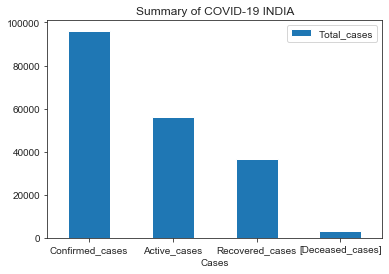

In [110]:
df.plot.bar(x='Cases',y='Total_cases',rot=0,title='Summary of COVID-19 INDIA')

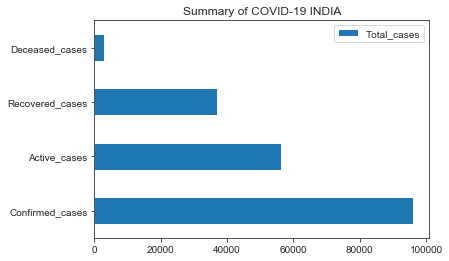

In [103]:
ab.plot.barh(rot=0,title='Summary of COVID-19 INDIA')

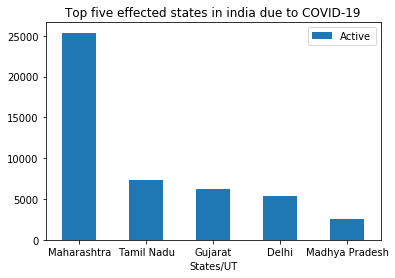

In [8]:
state.plot.bar(x='States/UT',y='Active',rot=0,title='Top five effected states in india due to COVID-19')
#Graph size ke liye
plt.rcParams["figure.figsize"] = (10,4)

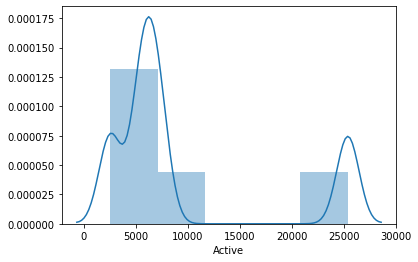

In [18]:
sns.distplot(state['Active'],bins=5)

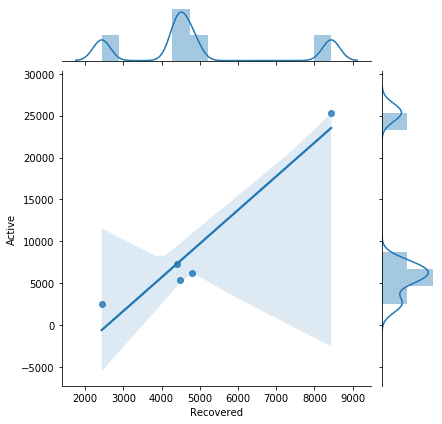

In [23]:
sns.jointplot(x='Recovered',y='Active',data=state,kind='reg')

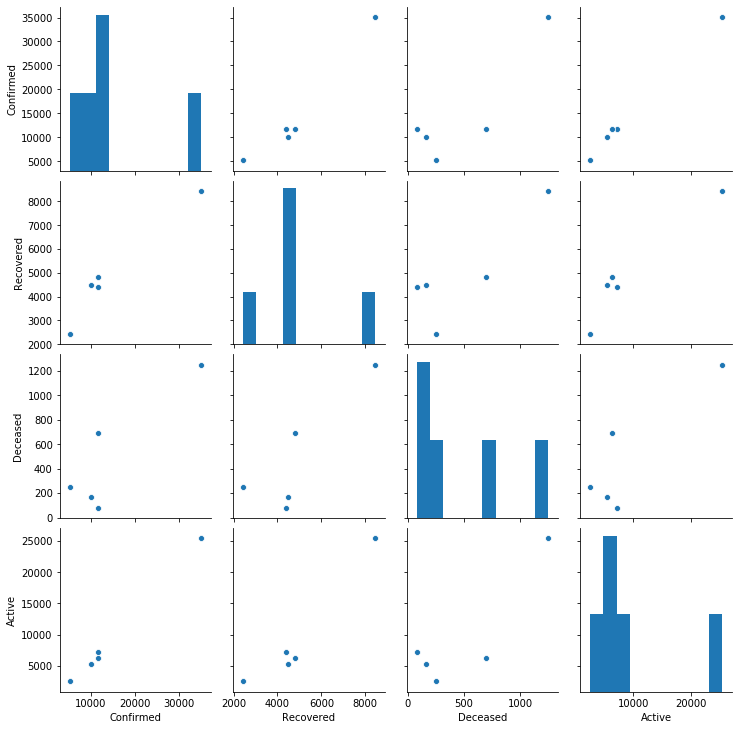

In [27]:
sns.pairplot(state)

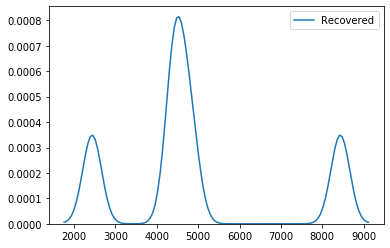

In [29]:
sns.kdeplot(state["Recovered"])

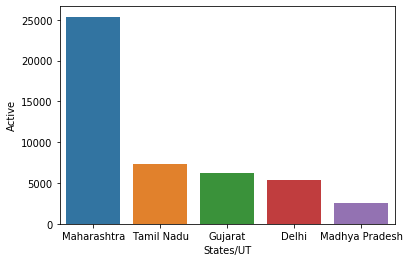

In [32]:
#Categorial PLot
sns.barplot(x='States/UT',y='Active',data=state)

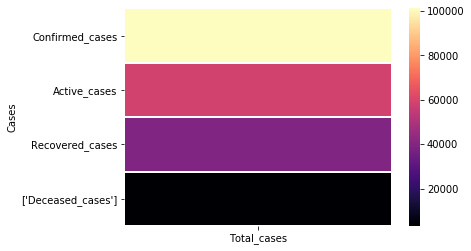

In [48]:
sns.heatmap(a,cmap='magma',linecolor='white',linewidths=1)

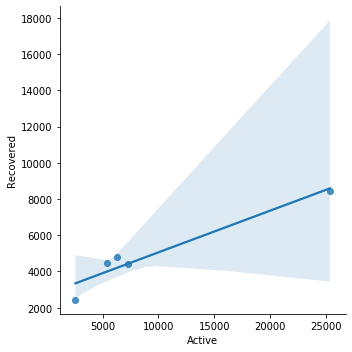

In [55]:
sns.lmplot(x='Active',y='Recovered',data=state)

AttributeError: 'Rectangle' object has no property 'bin'

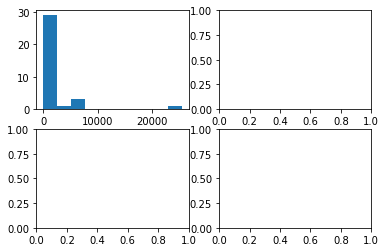